# 🔎 Project Information
#### 📌 Project Team: PTID-CDS-DEC-25-3482
#### 📌 Project Name: PRCP-1001 — RiceLeaf

---


# 🌾 Rice Leaf Disease Detection using Deep Learning

## 🔍 Problem Statement
Rice crops are highly affected by leaf diseases which reduce grain quality and yield. Traditional methods of detecting diseases are slow, require expertise, and are not scalable for large farms. Therefore, an automated system is required for fast and accurate disease identification.

This project focuses on classifying major rice leaf diseases from images using modern Deep Learning techniques.

---

## 🎯 Project Tasks

### 📝 Task 1 — Data Analysis Report
Prepare a complete Data Analysis (EDA) of the provided dataset:
- Dataset structure, class distribution & sample visualization
- Challenges like small dataset size, class similarity
- Need for preprocessing and augmentation

### 🤖 Task 2 — Model Development
Create a model that classifies three major rice leaf diseases:
1. **Bacterial Leaf Blight**  
2. **Brown Spot**  
3. **Leaf Smut / Leaf Blast** *(based on given dataset)*  

Goal: Achieve high classification accuracy with better generalization.

### 🔁 Task 3 — Technique Analysis & Reporting
Analyze improvement techniques such as:
- Data Augmentation
- Transfer Learning / CNN architectures
- Regularization methods

Create a **Model Comparison Report** showing:
- Performance of different models (e.g., CNN, MobileNetV2, ResNet50)
- Select the best performing model for production use

### ⚠️ Challenges Report
Include detailed report about:
- Challenges faced during data handling, training & evaluation
- Techniques used to overcome them with proper justification

---

## 🧠 Aim of the Project
Develop a robust and scalable **AI-based solution** to detect rice leaf diseases early, helping farmers reduce crop damage and improve food security.

---

## 📌 Final Deliverable
All the above tasks must be completed in a **single Jupyter Notebook** and submitted for final evaluation.


# Importing Libraries and Reading Images from Local Directory

In [4]:
# Data Handling & Visualization
import numpy as np          # Numerical operations
import pandas as pd          # Data handling (Reports)
import matplotlib.pyplot as plt   # Plotting graphs
import seaborn as sns  # Enhanced visualizations
import warnings
warnings.filterwarnings('ignore')
 
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers   # IMPORTANT: this import is required
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Image loading & augmentation
from tensorflow.keras.models import Sequential                      # For CNN model structure
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # CNN layers
from tensorflow.keras.applications import MobileNetV2               # Transfer learning model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input  # Preprocess images
from tensorflow.keras.callbacks import EarlyStopping                # Prevent overfitting

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix  # Performance metrics

print("Libraries Imported Successfully ✔️")

Libraries Imported Successfully ✔️


In [5]:
IMAGE_SIZE = 255
BATCH_SIZE = 16
CHANNEL = 3
EPOCHS = 20

# Use forward slashes OR raw string to avoid unicode errors
dataset_path = r"C:/Users/Excel/Desktop/RiceLeaf"

#  Load Dataset (WITHOUT splitting) — only one time load
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    label_mode='int',
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123
)


print("Classes:", dataset.class_names)


Found 119 files belonging to 3 classes.
Classes: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [6]:
class_names = dataset.class_names
print(class_names)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


# Label :-
#### This part shows the labels corresponding to the images in the batch. It's a 1D tensor with a shape of (32), indicating the label for each image in the batch. The labels seem to be integers, ranging from 0 to 2


In [8]:
for image , label in dataset.take(1):
    print("Image Shape :-",image.shape)
    print("Single Image :-",image[0])
    print("Label Batch (numpy):", label.numpy())

Image Shape :- (16, 255, 255, 3)
Single Image :- tf.Tensor(
[[[233.40111 218.40111 211.40111]
  [233.15294 221.63528 215.63528]
  [229.55293 218.77646 209.29411]
  ...
  [224.73552 207.73552 200.73552]
  [225.74118 208.74118 201.74118]
  [227.45874 210.45874 200.9764 ]]

 [[232.42021 217.42021 210.42021]
  [231.59999 218.59999 212.59999]
  [232.77647 219.77647 211.77647]
  ...
  [225.77647 208.77647 201.77647]
  [226.22353 209.22353 202.22353]
  [227.57973 210.57973 202.57973]]

 [[233.29411 220.29411 214.29411]
  [232.55986 217.55986 212.55986]
  [232.70589 217.70589 212.70589]
  ...
  [225.79234 208.79234 201.79234]
  [226.52249 208.52249 204.52249]
  [226.      212.      203.     ]]

 ...

 [[234.89479 220.16469 215.02974]
  [234.11073 219.11073 214.11073]
  [234.79237 219.79237 214.79237]
  ...
  [228.41498 210.12085 201.00323]
  [229.1834  210.1834  203.88927]
  [228.      209.      202.     ]]

 [[234.1849  219.1849  214.1849 ]
  [233.77649 219.22351 214.     ]
  [235.      220.4

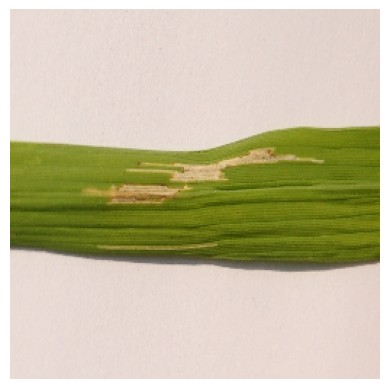

Label id: 0
Label name: Bacterial leaf blight


In [9]:
# "Now, we visualize one sample image from the batch along with its label to verify correctness."

img = image[0].numpy().astype("uint8")
plt.imshow(img)
plt.axis('off')
plt.show()

print("Label id:", label.numpy()[0])
print("Label name:", class_names[label.numpy()[0]])


# EDA - Exploratory Data Analysis
#### “Exploratory Data Analysis was performed to understand the dataset distribution, image characteristics, and class imbalance. The insights from EDA were used to design preprocessing and data augmentation strategies for model training.”

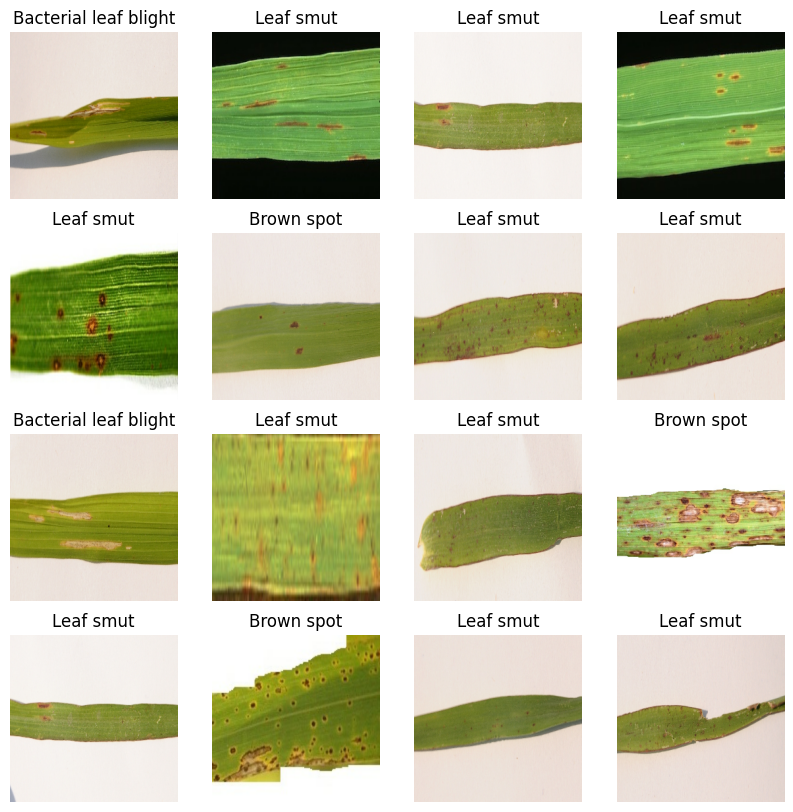

In [11]:
plt.figure(figsize=(10, 10))

for images, labels in dataset.take(1):
    batch_size = images.shape[0]  # number of images in batch

    rows = 4
    cols = 4                     # 4×4 = 16 images (batch size)
    
    for i in range(batch_size):  # safe range
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()


# 📌 Function to Split Dataset

#### A dataset is divided into three important subsets to train and evaluate a machine learning model properly:

## Training Set
#### Used by the model to learn patterns.
#### This is the data on which the model actually trains.

## Validation Set
#### Used to check the model’s performance during training.
#### Helps tune parameters and avoid overfitting.

## Test Set
#### Used after the model is fully trained.
#### This dataset evaluates how well the model works on unseen data.

In [13]:
total_batches = len(dataset)

# 70/20/10 split with safety
train_size = max(1, int(total_batches * 0.70))
val_size = max(1, int(total_batches * 0.20))
test_size = max(1, total_batches - train_size - val_size)

# Fix if overflow happens
if train_size + val_size + test_size > total_batches:
    test_size = max(1, total_batches - train_size - val_size)

# Create splits
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size).take(test_size)

print("Train:", len(train_ds))
print("Validation:", len(val_ds))
print("Test:", len(test_ds))


Train: 5
Validation: 1
Test: 2


# Create a Model 

### 🧩 Creating a Layer for Resizing and Normalization

Before feeding images into a neural network, it is important to resize them to a fixed size and normalize their pixel values.

### ✔ Why Resize?

Even though our dataset already contains images of size (256, 256),
this resizing layer is useful during real-world predictions,
because a user might upload an image of:

**200×300**

**1024×768**

**120×120**

This layer automatically converts such images to the required input shape
so the model never breaks.

### ✔ Why Normalization?

Raw images have pixel values in the range 0–255.
By dividing these values by 255, we convert them into 0–1 range,
which helps:

**Faster training**

**Stable gradients**

**Better accuracy**

To ensure normalization happens during training as well as inference,
we add this step as a layer inside the model.

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),  # Changed from layers.preprocessing.Resizing
    layers.Rescaling(1./255),  # Changed from layers.preprocessing.Rescaling
]) 

# 📊 Data Augmentation Report

## 📝 Why Data Augmentation Was Used

In this project, the dataset consists of only **119 total images** across **three classes**:

- 40 images of **Bacterial Leaf Blight**
- 40 images of **Brown Spot**
- 39 images of **Leaf Smut**

This is a very small dataset for training a deep learning model. If trained without augmentation, the model would likely:

- Overfit to the small training set
- Fail to generalize on new or unseen images
- Show poor validation and test accuracy

To overcome this, **data augmentation** was applied.

In [18]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# 🌱 Applying Data Augmentation to Train Dataset

In [20]:
tf.get_logger().setLevel('ERROR')
# Checking Validation Dataset
for bacth in val_ds.take(1):
    print("Validation Batch Found. ")

for image,label in val_ds.take(1):
    print(f"Validation Batch Shape: {image.shape}")

# Applying Data Augmentation to Training Datasettrain_ds = train_ds.map(
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)  

print(f"Train Batches :{len(train_ds)}")
print(f"Validation Batches : {len(val_ds)}")

Validation Batch Found. 
Validation Batch Shape: (16, 255, 255, 3)
Train Batches :5
Validation Batches : 1


In [21]:
print(f"Train Batches :{len(train_ds)}")
print(f"Validation Batches : {len(val_ds)}")

Train Batches :5
Validation Batches : 1


In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


# 🧱 Model Architecture

#### We build a Convolutional Neural Network (CNN) designed specifically for image classification. The architecture begins with preprocessing layers that handle resizing, normalization, and data augmentation. These layers ensure that all input images are consistent in size, properly scaled, and visually varied during training.

#### The core of the model consists of multiple Conv2D and MaxPooling layers, which extract meaningful features from the leaf images. After flattening the extracted features, we use fully connected (Dense) layers to learn high-level patterns. The final output layer uses a Softmax activation function, which converts model predictions into probabilities across the three classes of rice leaf diseases.

In [24]:
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL)),
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [25]:
print(f"Length of train_ds :{len(train_ds)} ")
print(f"Length of val_ds : {len(val_ds)}")
print(f"Length of test_ds : {len(test_ds)}")

if len(val_ds) == 0:
    print("Warning: val_ds is empty. Validation metrics will not be available.")

Length of train_ds :5 
Length of val_ds : 1
Length of test_ds : 2


In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 255, 255, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

# 🛠️ Compiling the Model

##### To train our CNN, we compile the model using:

- **Adam Optimizer for efficient learning**

- **SparseCategoricalCrossentropy as the loss (because labels are integer encoded)**

- **Accuracy as the evaluation metric**

##### This setup ensures smooth training and reliable performance on our 3-class dataset.

In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=85
)

Epoch 1/85
5/5 [==============================] - 9s 2s/step - loss: 1.1203 - accuracy: 0.3125 - val_loss: 1.1124 - val_accuracy: 0.2500
Epoch 2/85
5/5 [==============================] - 7s 1s/step - loss: 1.1047 - accuracy: 0.2625 - val_loss: 1.0947 - val_accuracy: 0.3125
Epoch 3/85
5/5 [==============================] - 7s 1s/step - loss: 1.0984 - accuracy: 0.3375 - val_loss: 1.0939 - val_accuracy: 0.3125
Epoch 4/85
5/5 [==============================] - 6s 1s/step - loss: 1.0977 - accuracy: 0.3625 - val_loss: 1.0867 - val_accuracy: 0.4375
Epoch 5/85
5/5 [==============================] - 6s 1s/step - loss: 1.0941 - accuracy: 0.3500 - val_loss: 1.0793 - val_accuracy: 0.3125
Epoch 6/85
5/5 [==============================] - 6s 1s/step - loss: 1.0916 - accuracy: 0.3500 - val_loss: 1.0743 - val_accuracy: 0.4375
Epoch 7/85
5/5 [==============================] - 6s 1s/step - loss: 1.0777 - accuracy: 0.4875 - val_loss: 1.0235 - val_accuracy: 0.5000
Epoch 8/85
5/5 [=========================

In [31]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 1s 142ms/step - loss: 0.2523 - accuracy: 0.9130


In [34]:
model.save("model.h5")

# 🌈 Plot Accuracy & Loss Curves

In [36]:
print(history)                    # history object
print(history.params)             # training parameters
print(history.history.keys())     # stored metrics

{'verbose': 1, 'epochs': 85, 'steps': 5}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [38]:
print("Available history keys:", history.history.keys())

# Check if validation dataset exists
if len(val_ds) == 0:
    print("⚠️ Warning: Validation dataset is empty. No validation accuracy/loss will be recorded.")

# Show loss for first 5 epochs
history.history['loss'][:5]

Available history keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[1.1202545166015625,
 1.1046721935272217,
 1.098381519317627,
 1.0976860523223877,
 1.0940768718719482]

In [40]:
acc = history.history['accuracy']
val_acc = history.history.get('val_accuracy')  # safer method

loss = history.history['loss']
val_loss = history.history.get('val_loss')


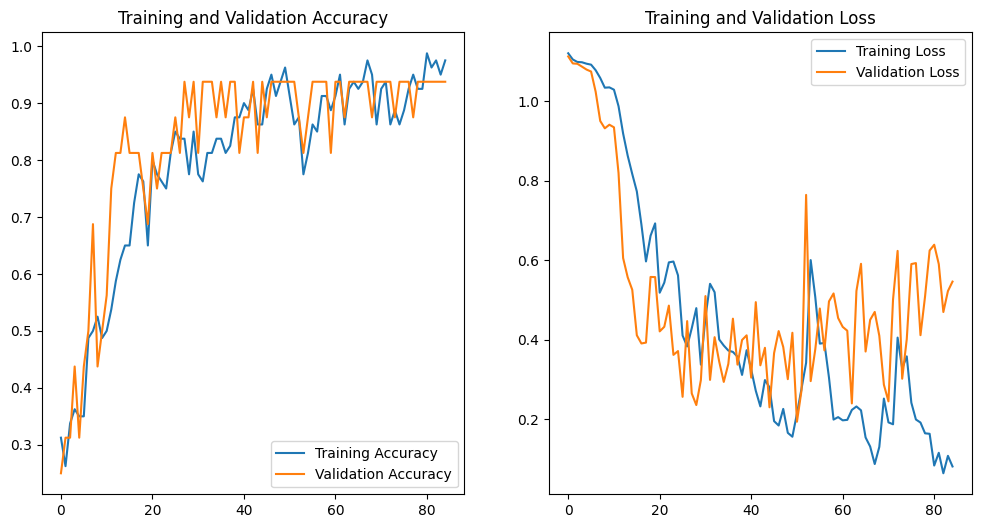

In [41]:
acc = history.history['accuracy']
val_acc = history.history.get('val_accuracy')  # use .get() in case it's None

loss = history.history['loss']
val_loss = history.history.get('val_loss')

epochs_range = range(len(acc))  # will automatically match the number of trained epochs

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
if val_acc:
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
if val_loss:
    plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Run Prediction on a Sample Image

Image to Predict:
Actual Label: Bacterial leaf blight
1/1 [==============================] - 0s 428ms/step
Predicted Label: Bacterial leaf blight


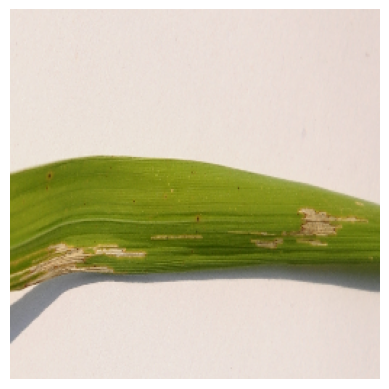

In [48]:
# Take 1 batch from test dataset
for images, labels in test_ds.take(1):

    img = images[0].numpy().astype("uint8")
    true_label = labels[0].numpy()

    print("Image to Predict:")
    plt.imshow(img)
    plt.axis("off")

    print("Actual Label:", class_names[true_label])

    # Predict whole batch
    preds = model.predict(images)
    pred_label = np.argmax(preds[0])

    print("Predicted Label:", class_names[pred_label])


# 🧠 Inference Report
--- 
# 📝 Purpose of Inference

Inference is performed after training to evaluate how effectively the model can classify new and unseen images.
It helps verify whether the model has learned meaningful patterns, rather than memorizing the training set.

# 🔍 What Inference Demonstrates

- The model’s ability to predict the correct class of a new image

- The confidence level associated with each prediction

- The difference between actual vs. predicted labels

- How well the model generalizes to real-world data
---
# 🎯 Why Inference Is Important

**Inference is a critical step because it:**

- Confirms the real-world performance of the trained model

- Helps identify whether the model is overfitting

- Validates the model’s practical usefulness

- Shows how confidently and accurately the model makes decisions
--- 
# ✅ Benefits of Performing Inference

- Measures prediction accuracy and reliability

- Highlights model strengths and weakness across classes

- Demonstrates the confidence score for each prediction

- Provides clear evidence of how the model behaves after deployment

**Inference ultimately ensures that the model is not just trained,
but is also ready for real-world application.**

# Function for inference

In [54]:
def predict(model, img):
    img = tf.image.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.expand_dims(img, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100 * np.max(predictions), 2)

    return predicted_class, confidence


1/1 [==============================] - 0s 49ms/step


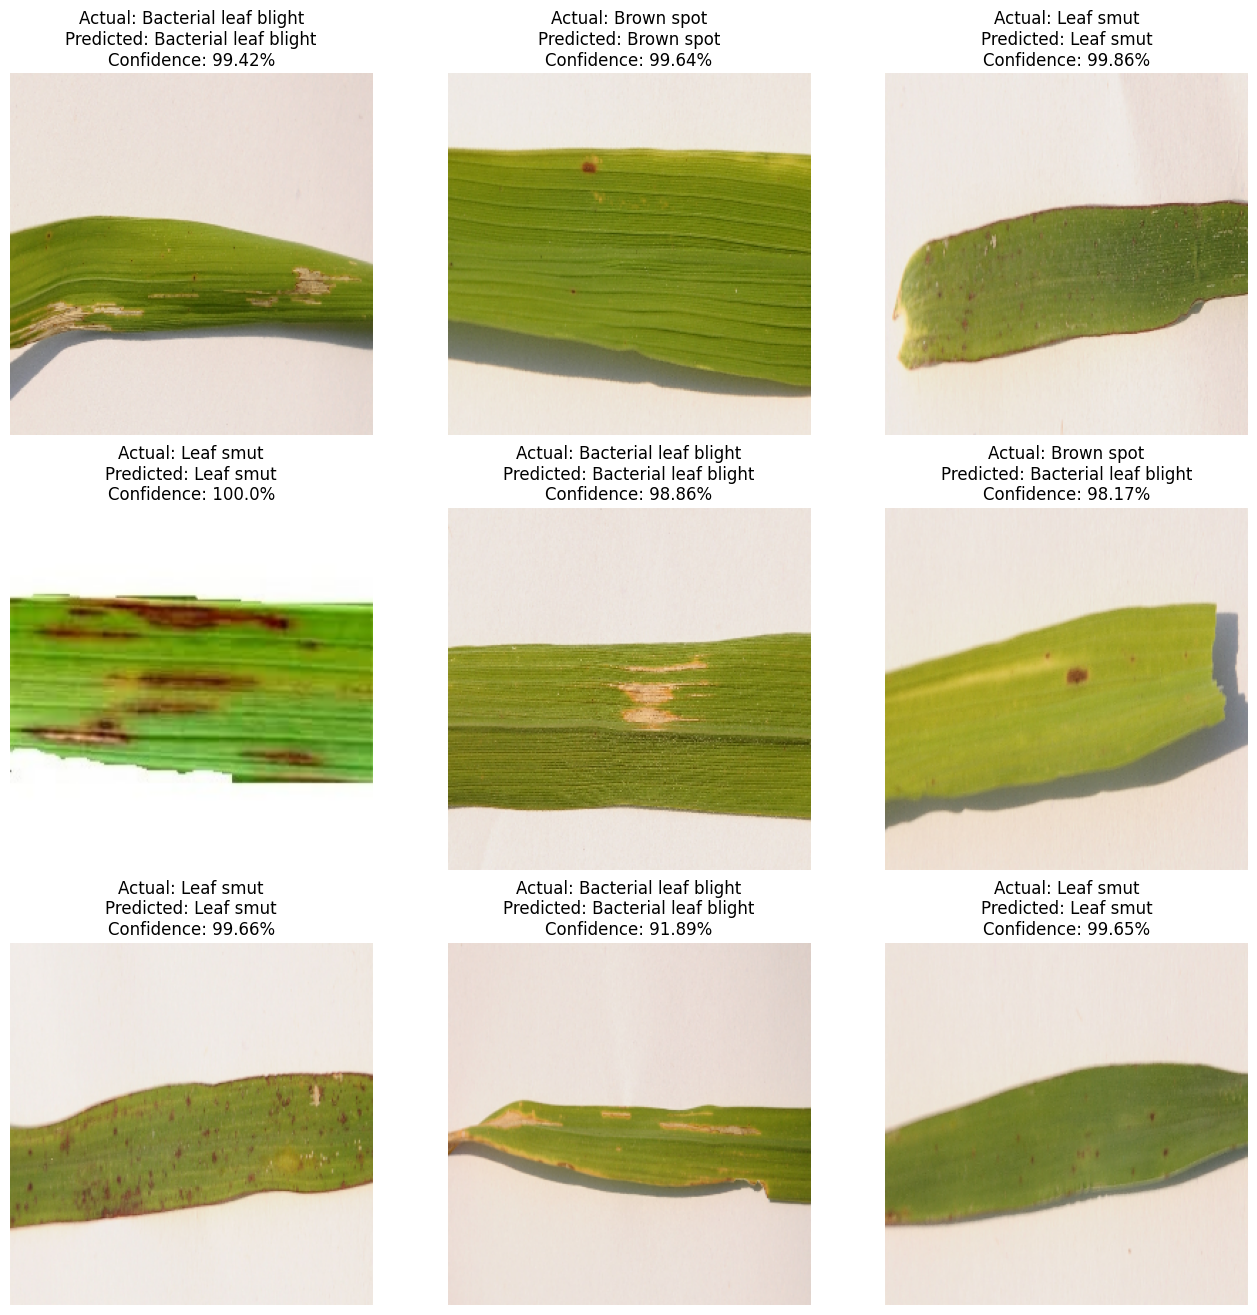

In [59]:
plt.figure(figsize=(16, 16))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")

        predicted_class, confidence = predict(model, images[i])

        actual = class_names[labels[i].numpy()]

        plt.imshow(img)
        plt.title(f"Actual: {actual}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis('off')


In [71]:
model.save("Plant_leaf_diseases_detection_model.h5")